<a href="https://colab.research.google.com/github/Geevanandam/BikeSharingAssignment/blob/main/BikeSharingAssignment_Geeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Data for Analysis

In [ ]:
# @title Import data file from Github

!wget -c -O day.csv https://raw.githubusercontent.com/Geevanandam/BikeSharingAssignment/refs/heads/main/day.csv


--2024-09-22 11:18:25--  https://raw.githubusercontent.com/Geevanandam/BikeSharingAssignment/refs/heads/main/day.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



# Prepare Data

In [ ]:
# @title Import Statements
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# @title Export data to Frame for processing

df = pd.read_csv('/content/day.csv')

# Print the first few rows of the DataFrame to verify it's loaded
print(df.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                730 non-null    int64  
 1   yr                     730 non-null    int64  
 2   holiday                730 non-null    int64  
 3   workingday             730 non-null    int64  
 4   temp                   730 non-null    float64
 5   atemp                  730 non-null    float64
 6   hum                    730 non-null    float64
 7   windspeed              730 non-null    float64
 8   cnt                    730 non-null    int64  
 9   season_Spring          730 non-null    int64  
 10  season_Summer          730 non-null    int64  
 11  season_Winter          730 non-null    int64  
 12  mnth_2                 730 non-null    int64  
 13  mnth_3                 730 non-null    int64  
 14  mnth_4                 730 non-null    int64  
 15  mnth_5

In [ ]:
df.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Cloudy,weathersit_Light Rain
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,...,0.082192,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.336986,0.028767
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,...,0.274845,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.473004,0.167266
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(df.shape)

(730, 31)


In [ ]:
# Drop columns 'casual' and 'registered'
df.drop(['casual', 'registered', 'dteday'], axis=1, inplace=True)


# Map categorical variable values (assuming a data dictionary is available)
df['season'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'})
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain + Thunderstorm'})

In [ ]:
# prompt: apply get dummies
# Apply get_dummies to categorical features
df = pd.get_dummies(df, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True, dtype=int)
print(df.head())

   instant  yr  holiday  workingday       temp     atemp      hum  windspeed  \
0        1   0        0           0  14.110847  18.18125  80.5833  10.749882   
1        2   0        0           0  14.902598  17.68695  69.6087  16.652113   
2        3   0        0           1   8.050924   9.47025  43.7273  16.636703   
3        4   0        0           1   8.200000  10.60610  59.0435  10.739832   
4        5   0        0           1   9.305237  11.46350  43.6957  12.522300   

    cnt  season_Spring  ...  mnth_11  mnth_12  weekday_1  weekday_2  \
0   985              1  ...        0        0          0          0   
1   801              1  ...        0        0          0          0   
2  1349              1  ...        0        0          1          0   
3  1562              1  ...        0        0          0          1   
4  1600              1  ...        0        0          0          0   

   weekday_3  weekday_4  weekday_5  weekday_6  weathersit_Cloudy  \
0          0          0 

# Exploratory data analysis(EDA)

# Univariate Analysis

In [ ]:
# @title Descriptive Statistics:
print(df.describe())

          instant          yr     holiday  workingday        temp       atemp  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    0.500000    0.028767    0.683562   20.319259   23.726322   
std    210.877136    0.500343    0.167266    0.465405    7.506729    8.150308   
min      1.000000    0.000000    0.000000    0.000000    2.424346    3.953480   
25%    183.250000    0.000000    0.000000    0.000000   13.811885   16.889713   
50%    365.500000    0.500000    0.000000    1.000000   20.465826   24.368225   
75%    547.750000    1.000000    0.000000    1.000000   26.880615   30.445775   
max    730.000000    1.000000    1.000000    1.000000   35.328347   42.044800   

              hum   windspeed          cnt  season_Spring  ...     mnth_11  \
count  730.000000  730.000000   730.000000     730.000000  ...  730.000000   
mean    62.765175   12.763620  4508.006849       0.246575  ...    0.082192   
std     14.237589    5.195841  1936.

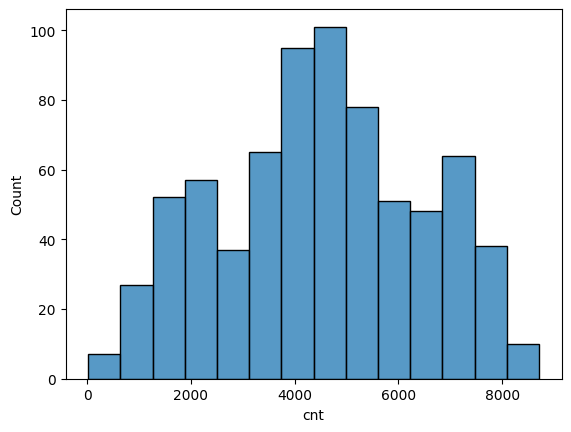

In [ ]:
# @title Histograms
sns.histplot(df['cnt'])
plt.show()

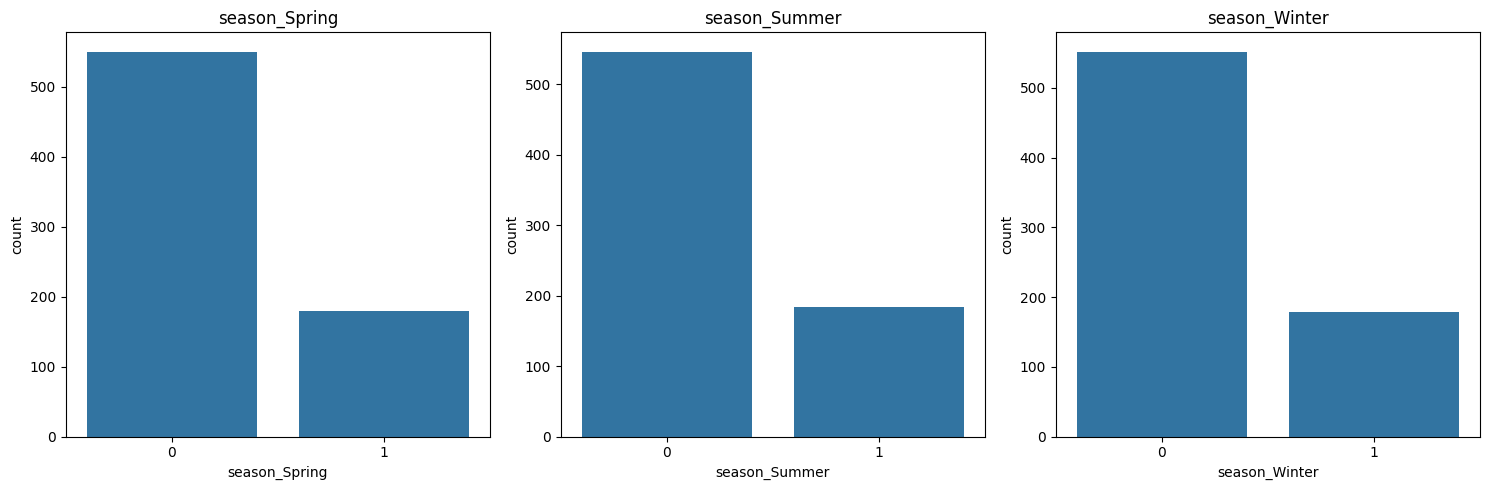

In [ ]:
# @title Bar Charts

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns for subplots
sns.countplot(x='season_Spring', data=df, ax=axes[0])
sns.countplot(x='season_Summer', data=df, ax=axes[1])
sns.countplot(x='season_Winter', data=df, ax=axes[2])

axes[0].set_title('season_Spring')
axes[1].set_title('season_Summer')
axes[2].set_title('season_Winter')

plt.tight_layout()
plt.show()

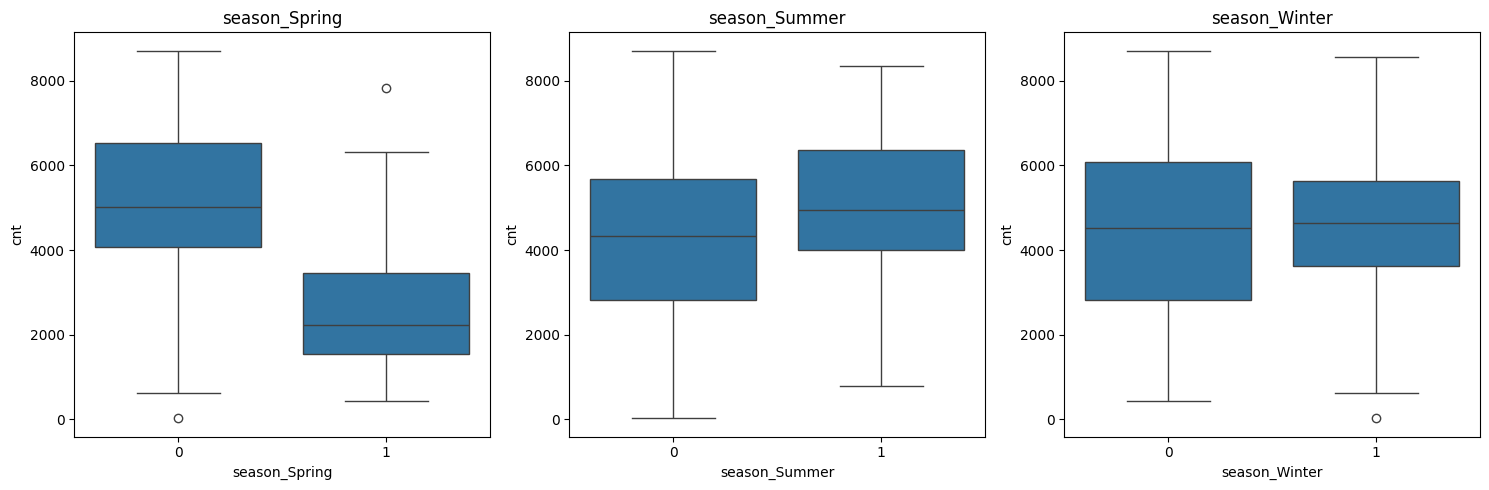

In [ ]:
# @title Box Plots

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns for subplots

# Create boxplots for each season
sns.boxplot(x='season_Spring', y='cnt', data=df, ax=axes[0])
sns.boxplot(x='season_Summer', y='cnt', data=df, ax=axes[1])
sns.boxplot(x='season_Winter', y='cnt', data=df, ax=axes[2])

# Customize the plots as needed
axes[0].set_title('season_Spring')
axes[1].set_title('season_Summer')
axes[2].set_title('season_Winter')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# Bivariate Analysis

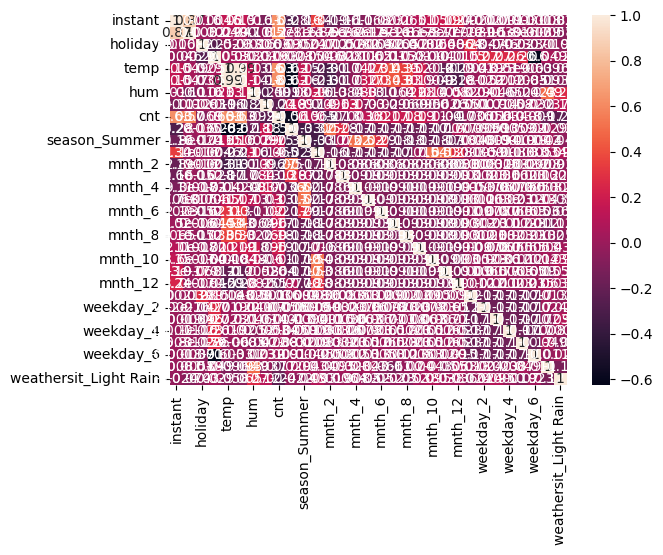

In [ ]:
# @title Correlate Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
# @title Group Statistics
grouped_data = df.groupby('season')['cnt'].mean()
print(grouped_data)

KeyError: 'season'